# Chapter3 KNN算法

In [1]:
# Before We Begin:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读入MNIST数据集：
## MNIST_X存储了1000个手写字体，每个手写字体是28x28=784长度的图片灰度值
## MNIST_Y存储了1000个手写字体的标签。
m_x = np.loadtxt("mnist_x.txt", delimiter=" ", dtype=int)
m_y = np.loadtxt("mnist_y.txt", dtype=int)
m_x
m_y

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

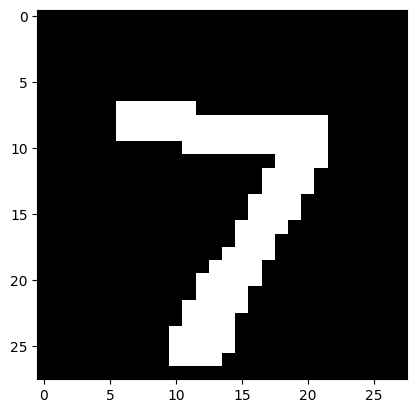

In [3]:
# 数据集可视化：
data = np.reshape(m_x[0], [28, 28])
plt.figure();
## imshow()会绘制图像到画布上，show()会显示出来
plt.imshow(data, cmap="gray")
plt.show()

In [4]:
# 数据分割：分为训练集和测试集
ratio = 0.8
split = int(len(m_x)*ratio)

## 打乱数据：
### 指定随机数种子：
np.random.seed(0)
idx = np.random.permutation(np.arange(len(m_x)))
m_x = m_x[idx]
m_y = m_y[idx]
x_train, x_test = m_x[:split], m_x[split:]
y_train, y_test = m_y[:split], m_y[split:]
x_train, x_test
y_train

array([0, 7, 2, 8, 1, 4, 4, 3, 2, 9, 9, 9, 4, 1, 3, 0, 9, 7, 1, 2, 1, 9,
       3, 0, 3, 9, 5, 4, 4, 2, 2, 5, 3, 1, 3, 4, 3, 6, 1, 1, 3, 2, 2, 4,
       1, 1, 3, 7, 6, 6, 2, 4, 7, 4, 9, 8, 1, 3, 7, 5, 3, 2, 3, 1, 7, 1,
       9, 3, 9, 3, 2, 8, 4, 4, 2, 5, 9, 2, 8, 5, 5, 2, 6, 3, 7, 8, 2, 9,
       4, 9, 2, 7, 3, 1, 5, 0, 6, 9, 5, 0, 5, 2, 4, 4, 5, 7, 7, 4, 3, 9,
       7, 2, 8, 1, 7, 1, 0, 3, 1, 2, 3, 0, 7, 7, 7, 8, 0, 5, 2, 0, 8, 9,
       8, 0, 3, 2, 0, 5, 1, 8, 0, 1, 8, 2, 2, 0, 6, 5, 6, 7, 0, 3, 8, 4,
       2, 2, 6, 2, 6, 5, 8, 6, 6, 8, 3, 1, 9, 6, 5, 2, 2, 3, 1, 1, 2, 5,
       5, 3, 6, 7, 1, 9, 2, 9, 6, 2, 0, 8, 9, 1, 6, 7, 8, 1, 6, 7, 4, 0,
       2, 9, 3, 3, 1, 1, 6, 0, 6, 2, 5, 6, 9, 2, 1, 3, 0, 9, 3, 1, 1, 7,
       8, 0, 1, 8, 5, 0, 5, 7, 3, 4, 8, 4, 4, 0, 9, 7, 6, 9, 0, 8, 4, 4,
       3, 5, 3, 6, 5, 1, 5, 1, 5, 7, 4, 4, 7, 6, 7, 8, 1, 2, 3, 1, 8, 6,
       1, 6, 1, 9, 1, 1, 5, 7, 6, 5, 4, 5, 2, 3, 0, 2, 1, 1, 5, 5, 5, 1,
       7, 2, 6, 2, 8, 4, 7, 7, 1, 5, 8, 1, 5, 0, 9,

In [5]:
# 定义KNN算法：
def distance(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

class KNN:
    def __init__(self, k, label_num):
        self.k = k
        self.label_num = label_num  # 类别的数量
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def get_knn_indices(self, x):
        """
        获取距离目标样本点最近的K个样本点的下标。
        """
        # 计算已知样本到目标样本的距离：
        dis = list(map(lambda a: distance(a,x), self.x_train))
        # 按照距离从小到大排序，并得到对应的下标：
        knn_indices = np.argsort(dis)
        # 获取最近的K个元素下标：
        knn_indices = knn_indices[:self.k]
        return knn_indices
    
    def get_label(self, x):
        """
        观察K个近邻并使用np.argmax获取其中数量最多的类别
        """
        # 获取K的近邻的坐标：
        knn_indices = self.get_knn_indices(x)
        # 类别计数：
        label_statistic = np.zeros(shape=[self.label_num], dtype=int)
        for index in knn_indices:
            label = int(self.y_train[index])
            label_statistic[label] += 1
        # 返回数量最多的标签的坐标：
        return np.argmax(label_statistic)
    
    def predict(self, x_test):
        # 预测test_x的类别：
        predicted_test_labels = np.zeros(shape=[len(x_test)], dtype=int)
        for i,x in enumerate(x_test):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels


In [6]:
# 在测试集上进行验证：
for k in range(1, 10):
    knn = KNN(k, label_num=10)
    knn.fit(x_train, y_train)
    predicted_labels = knn.predict(x_test)

    accuracy = np.mean(predicted_labels == y_test)
    print(f"K的取值为:{k}, 预测准确率为{accuracy * 100:.1f}%")

K的取值为:1, 预测准确率为88.0%
K的取值为:2, 预测准确率为88.0%
K的取值为:3, 预测准确率为88.0%
K的取值为:4, 预测准确率为87.0%
K的取值为:5, 预测准确率为88.5%
K的取值为:6, 预测准确率为88.5%
K的取值为:7, 预测准确率为88.0%
K的取值为:8, 预测准确率为87.5%
K的取值为:9, 预测准确率为87.0%


## $\S3.3$ 使用SciKit-Learn实现KNN算法

In [7]:
# Before We Begin:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [8]:
# 读入高斯分布的数据集：
"""
高斯分布数据集记录了两个独立地高斯分布生成坐标，一共有三列数据：
列1: x坐标
列2: y坐标
列3: 类别
"""
data = np.loadtxt("gauss.csv", delimiter=",")
x_train = data[:,:2]
y_train = data[:,2]
print("数据集大小:", len(x_train))

数据集大小: 200


Text(0, 0.5, 'Y Axis')

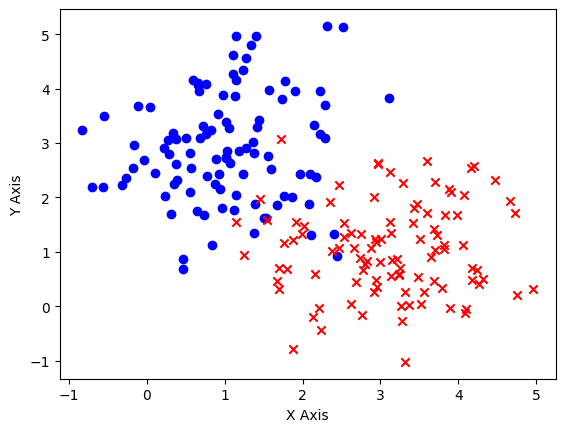

In [ ]:
# 数据集可视化：
plt.figure()
## 布尔索引：索引对应的x,y坐标
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c="blue", marker="o")
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c="red", marker="x")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

In [51]:
# 以平面上的点作为测试集，进行网格采样:
## 步长
step = 0.002
## 网格边界
x_min, x_max = np.min(x_train[:,0]) - 1, np.max(x_train[:,0]) + 1
y_min, y_max = np.min(x_train[:,1]) - 1, np.max(x_train[:,1]) + 1
## 构造采样
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis=1)
grid_data

array([[-1.828 , -2.0207],
       [-1.826 , -2.0207],
       [-1.824 , -2.0207],
       ...,
       [ 5.958 ,  6.1513],
       [ 5.96  ,  6.1513],
       [ 5.962 ,  6.1513]], shape=(15922952, 2))

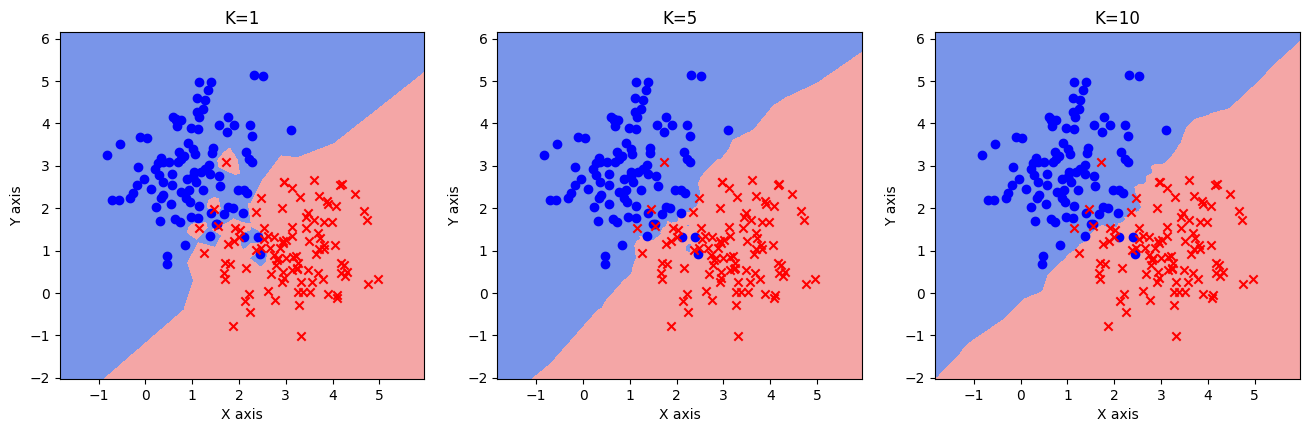

In [54]:
# 绘制采样结果
fig = plt.figure(figsize=(16, 4.5));
## 分类K值
ks = [1,5,10]
camp_light = ListedColormap(['royalblue', 'lightcoral'])
## 训练并预测测试样本点:
for i, k in enumerate(ks):
    ### 定义KNN分类器
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    z = knn.predict(grid_data)
    ### 画出分类结果
    ax = fig.add_subplot(1, len(ks), i+1)
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), cmap=camp_light, alpha=0.7)
    ax.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c="blue", marker="o")
    ax.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c="red", marker="x")

    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_title(f"K={k}")
plt.show()

array([2.9668])